In [43]:
result_folder = "first_results_70"

In [1]:
import json
import os

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve

In [2]:
with open("loss_history.json", "r") as f:
    loss_history = json.load(f)
    
with open("predictions.json", "r") as f:
    predictions = json.load(f)

Text(0.5, 1.0, 'Training Loss')

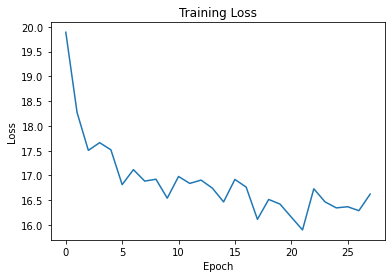

In [13]:
losses = [np.mean(loss_history[e]) for e in loss_history]
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")

In [58]:
scores = predictions["predictions"]
labels = predictions["labels"]
font_pairs = predictions["font_pairs"]
font_to_label = predictions["font_to_label"]
label_to_font = { v: k for k,v in font_to_label.items() }
n_fonts = len(font_to_label)

In [15]:
fonts = set(np.array(font_pairs).flatten())
font_to_roc_curve = {}
for font in fonts:
    y_true, y_score = [], []
    for score, label, font_pair in zip(scores, labels, font_pairs):
        if font in font_pair:
            y_true.append(int(label))
            y_score.append(score)
            
    font_to_roc_curve[font] = roc_curve(y_true, y_score)

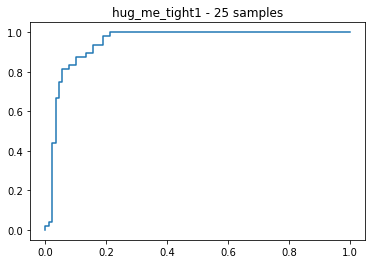

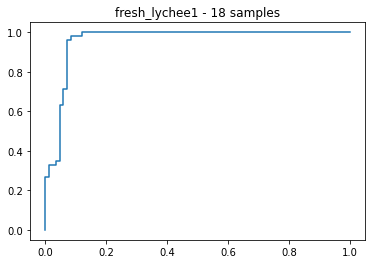

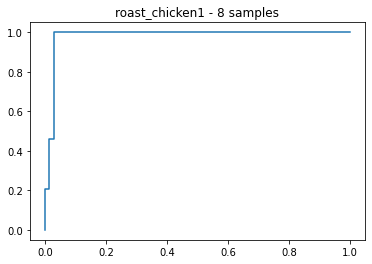

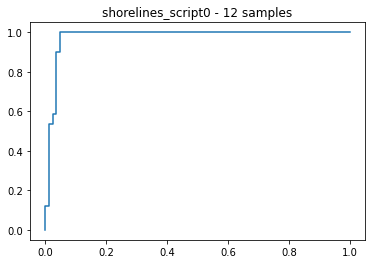

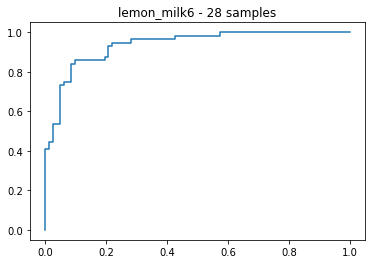

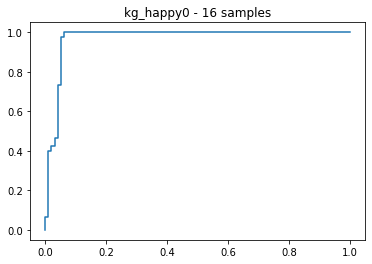

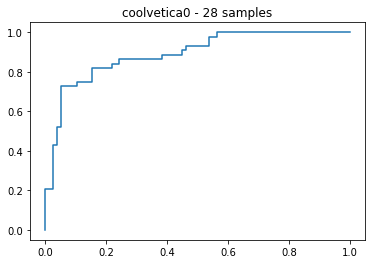

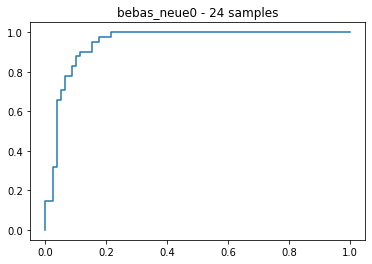

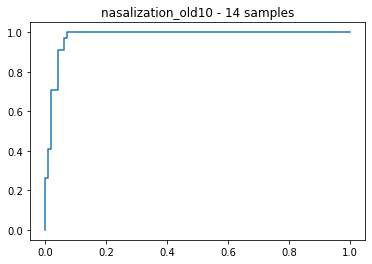

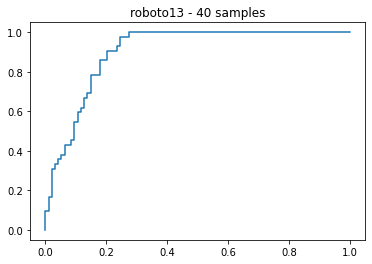

In [16]:
for font in fonts:
    fpr,tpr,_ = font_to_roc_curve[font]
    plt.plot(fpr,tpr)
    plt.title(f"{label_to_font[font]} - {len(fpr)} samples")
    plt.show()

In [21]:
import seaborn as sns

In [42]:
font_to_label

{'hug_me_tight1': 0,
 'fresh_lychee1': 1,
 'roast_chicken1': 2,
 'shorelines_script0': 3,
 'lemon_milk6': 4,
 'kg_happy0': 5,
 'coolvetica0': 6,
 'bebas_neue0': 7,
 'nasalization_old10': 8,
 'roboto13': 9}

In [55]:
def print_predictions(font, other_font = None):
    scores_1, scores_0 = [], []
    for (font1, font2), label, score in zip(font_pairs, labels, scores):
        if font in [font1, font2]:
            if label == 1:
                scores_1.append(score)
            elif other_font is None or other_font in [font1, font2]:
                scores_0.append(score)
    sns.distplot(scores_0)
    sns.distplot(scores_1)
    plt.title(f"Density of predictions")
    plt.legend([f"(label 0) Pairs of {label_to_font[font]} and {'another font' if not other_font else label_to_font[other_font]}",
                f"(label 1) Pairs of {label_to_font[font]} sentences"])
    plt.show()

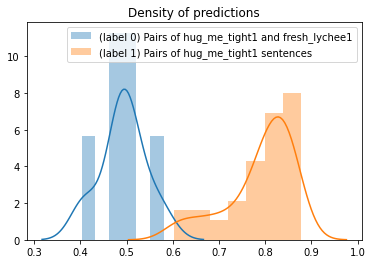

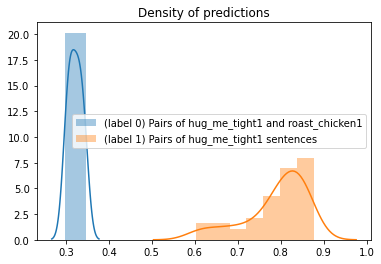

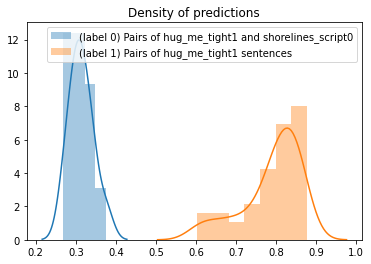

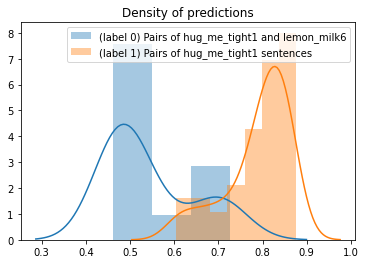

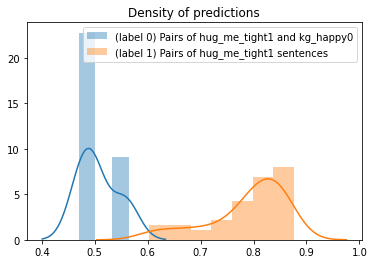

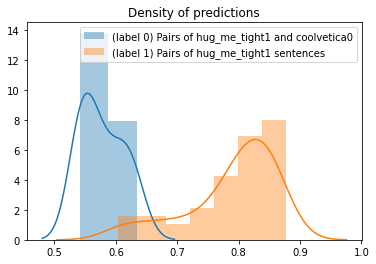

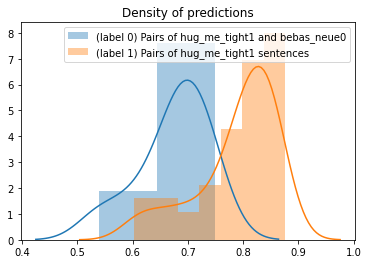

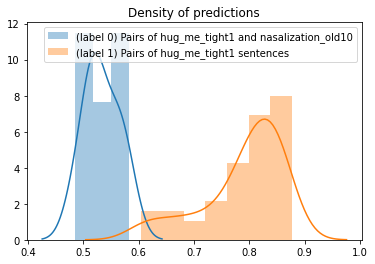

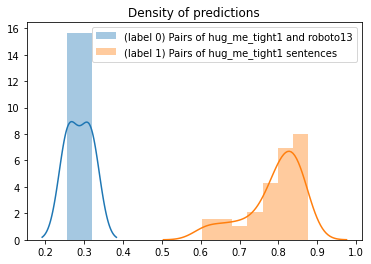

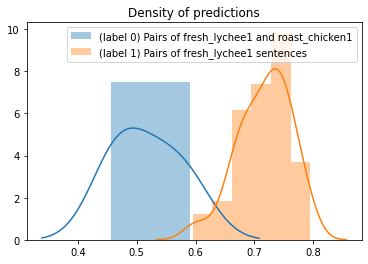

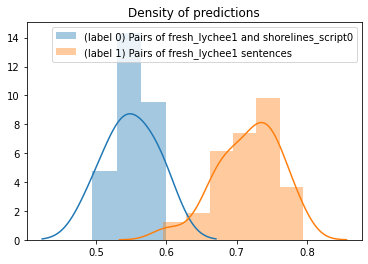

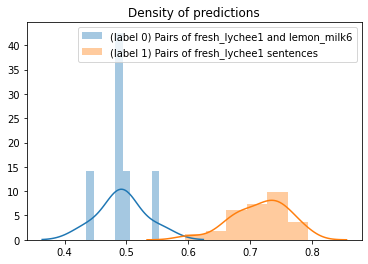

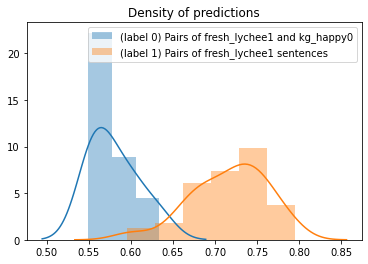

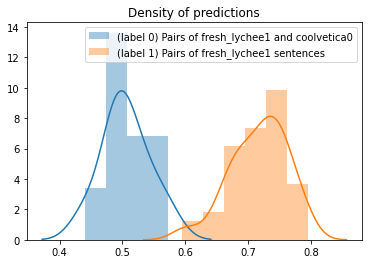

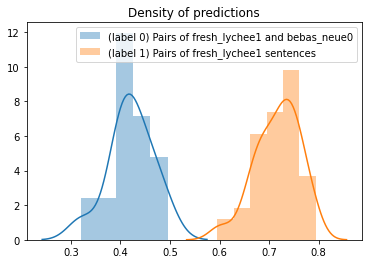

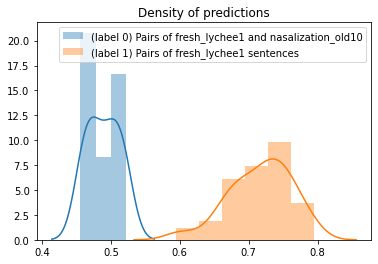

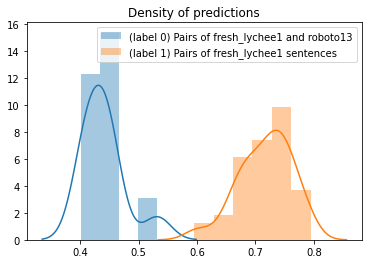

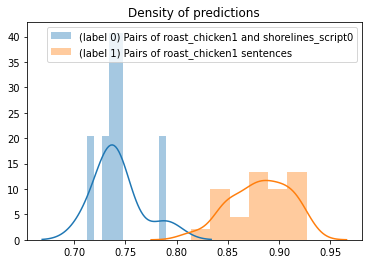

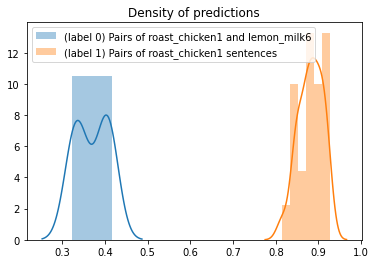

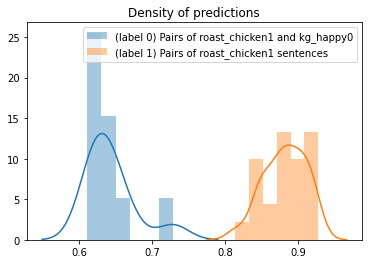

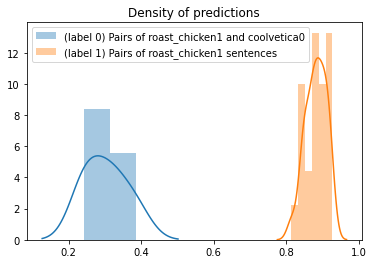

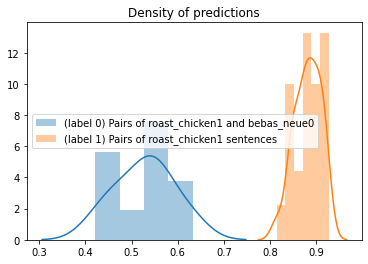

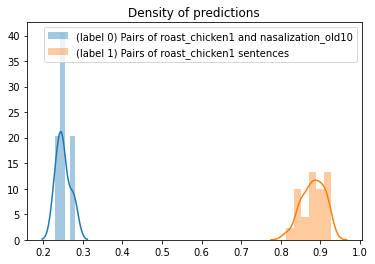

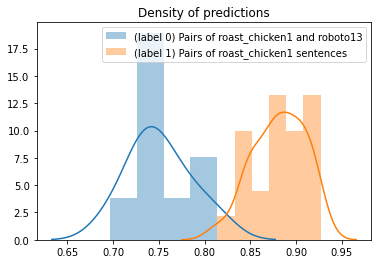

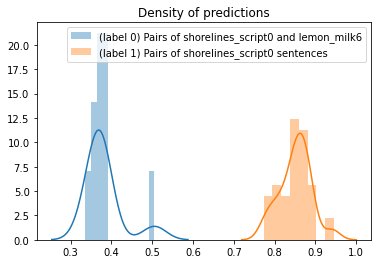

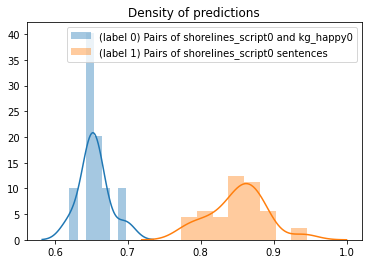

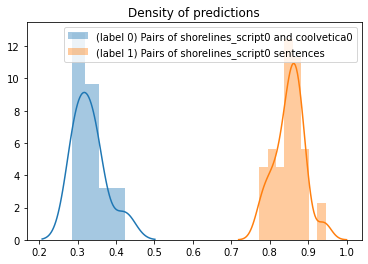

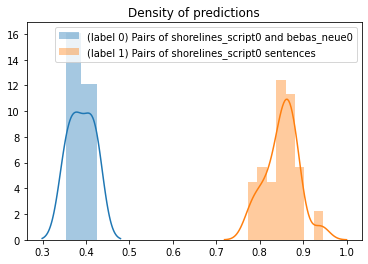

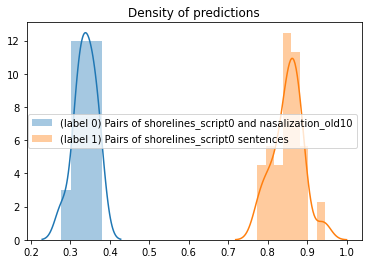

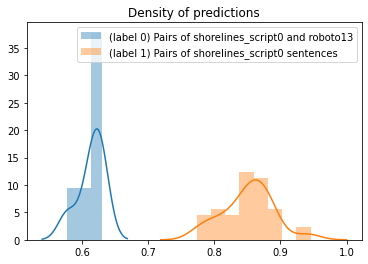

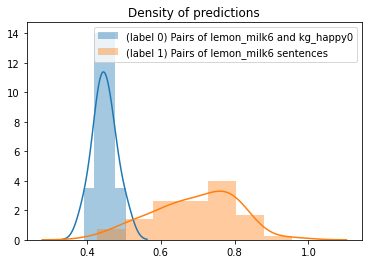

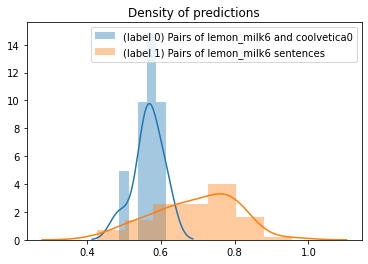

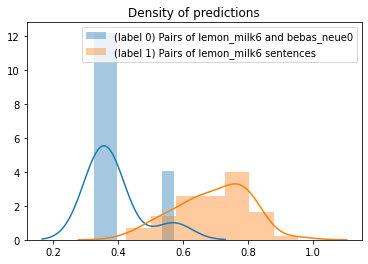

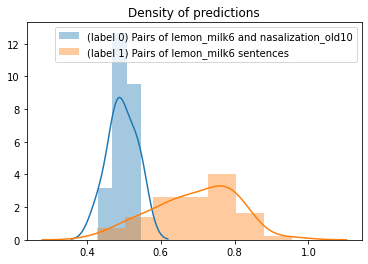

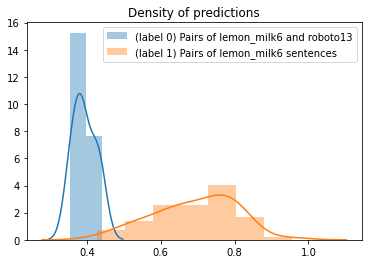

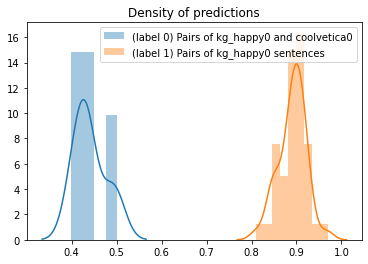

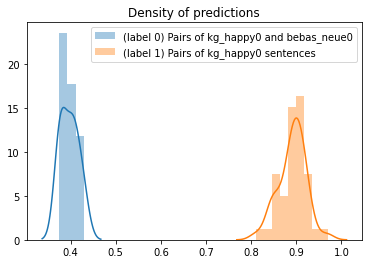

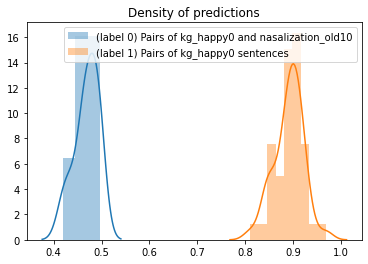

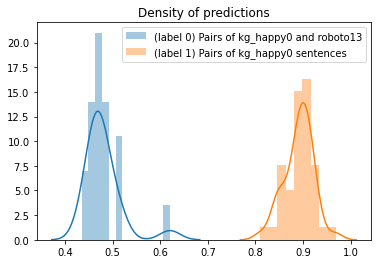

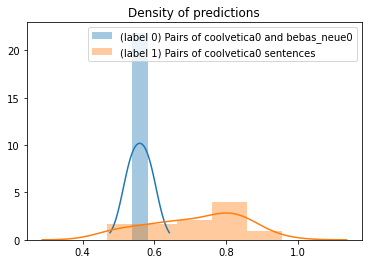

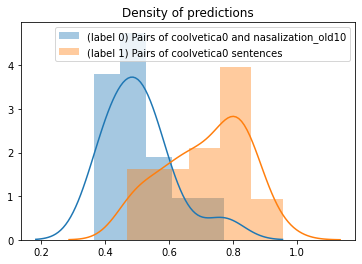

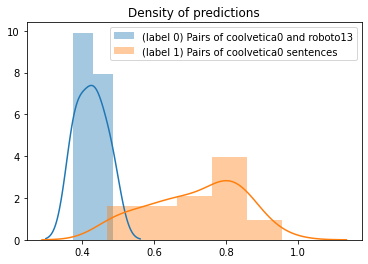

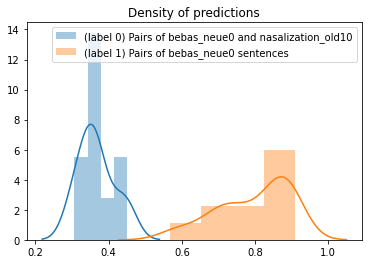

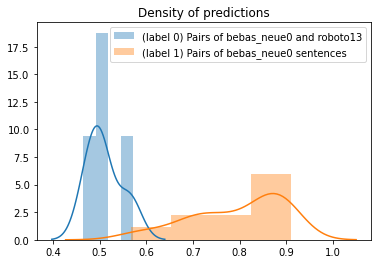

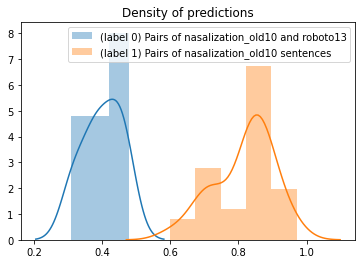

In [59]:
for i in range(n_fonts):
    for j in range(i+1, n_fonts):
        print_predictions(i, j)

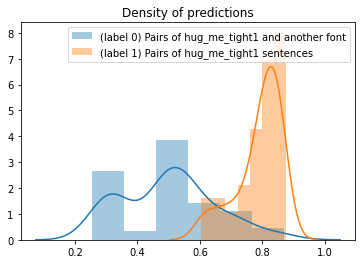

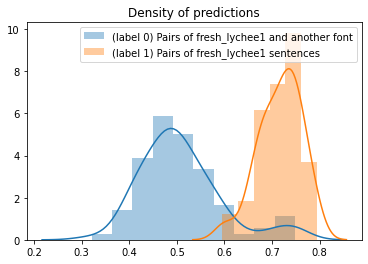

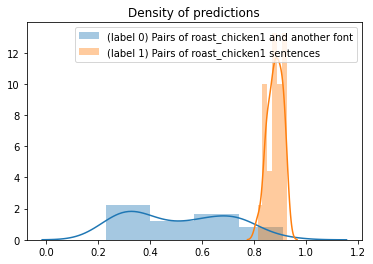

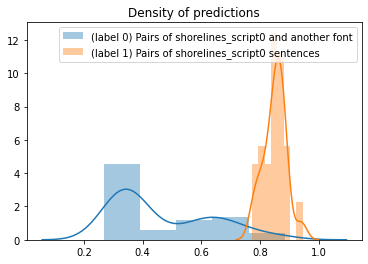

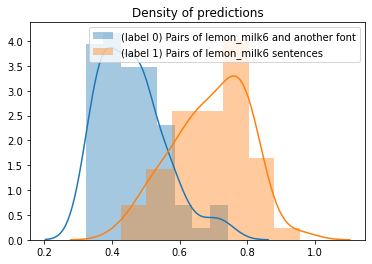

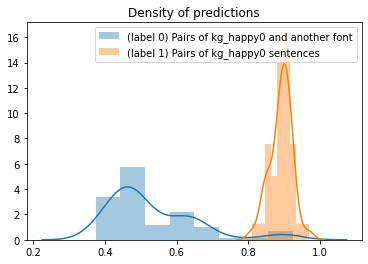

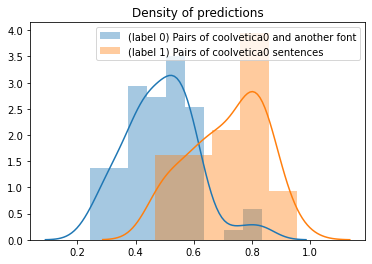

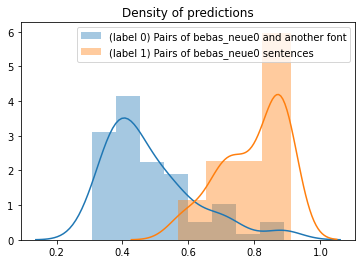

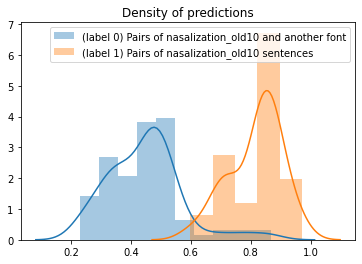

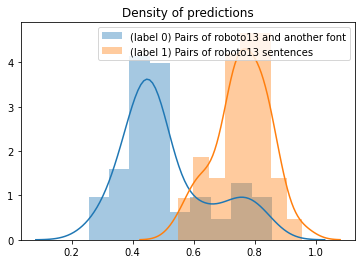

In [57]:
for font in font_to_label.values():
    print_predictions(font)